### Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, matthews_corrcoef

# Set the style for seaborn plots
sns.set_theme(style="whitegrid")

# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Warning messages
import warnings

warnings.filterwarnings('ignore')

# Import custom functions
import sys
import os

sys.path.append(os.path.abspath('../'))

### Read Data

In [2]:
df_raw = pd.read_csv('train.csv')

In [3]:
df_raw.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
df_raw.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Display the entire DataFrame
display(df_raw.describe(include='all'))

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034,165034.000000,165034,165034,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
unique,NaN,NaN,2797,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Hsia,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2456,NaN,94215,93150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,82516.5000,1.569201e+07,NaN,656.454373,NaN,NaN,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,NaN,80.103340,NaN,NaN,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,NaN,597.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,NaN,659.000000,NaN,NaN,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,NaN,710.000000,NaN,NaN,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000


### Exploratory Data Analysis 

In [7]:
# Copy the dataframe
df = df_raw.copy()

# Drop the columns that are not needed
df = df.drop(['id','CustomerId', 'Surname'], axis=1)


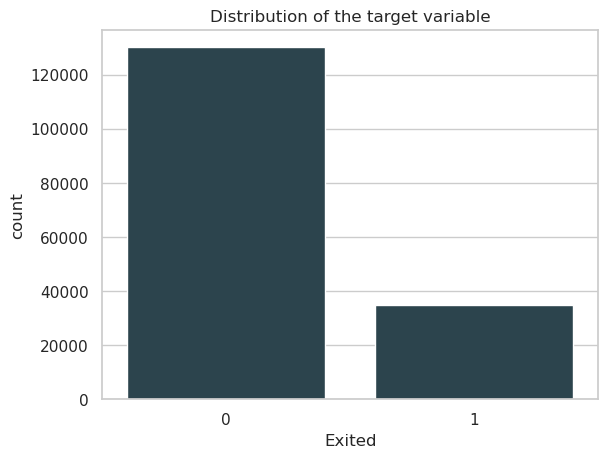

In [8]:
# Distribution of the target variable

sns.countplot(x='Exited', data=df)
plt.title('Distribution of the target variable')
plt.show()

In [9]:
# Copy the dataframe
df_eda = df.copy()

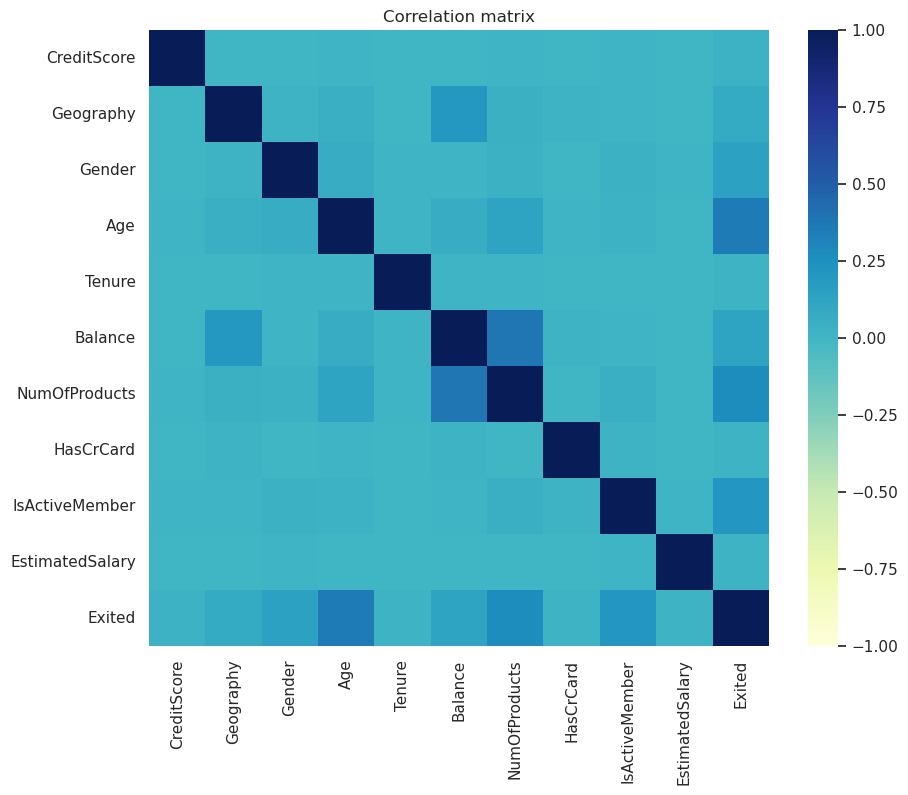

In [10]:
from sklearn.preprocessing import LabelEncoder

# Identify the categorical columns
categorical_columns = df_eda.select_dtypes(include=['object']).columns

# Transform categorical variables 
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_eda[column] = label_encoder.fit_transform(df_eda[column].astype(str))

# Correlation matrix
corr = df_eda.corr('spearman').abs()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, fmt=".2f", cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

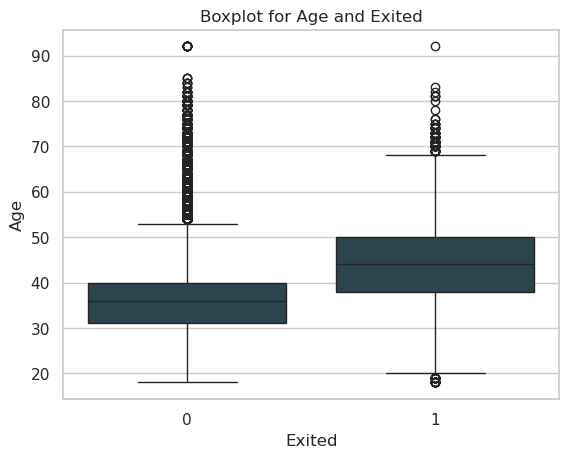

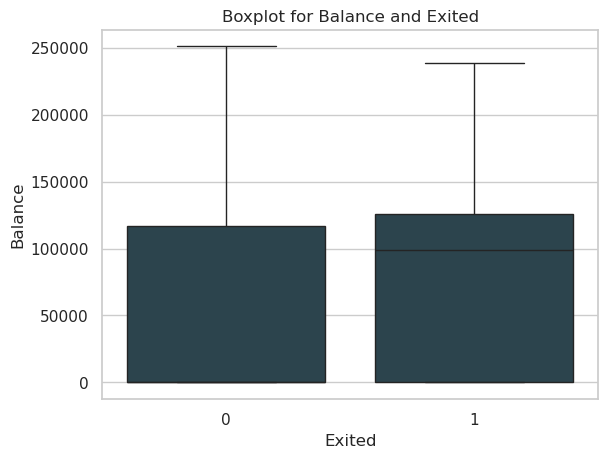

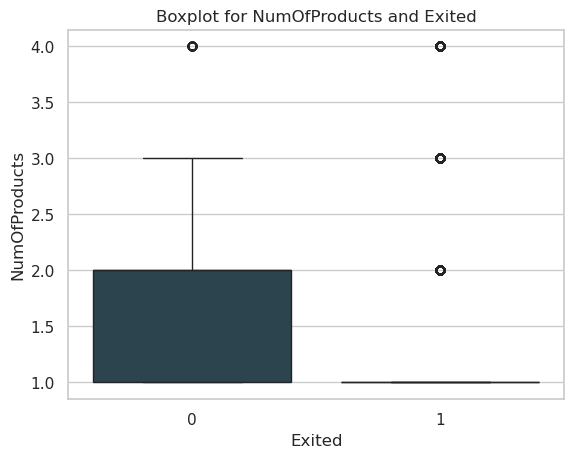

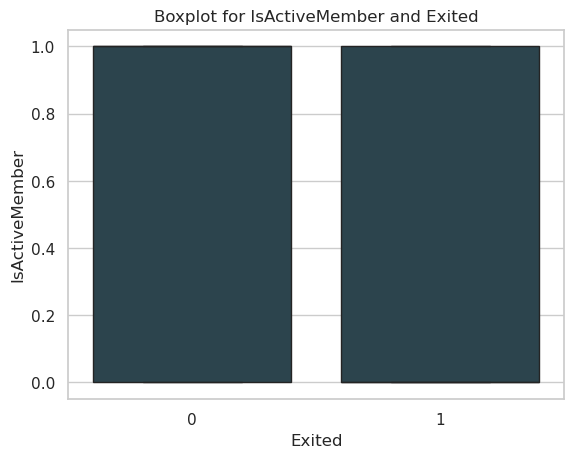

In [11]:
# Boxplot for Age and Exited
sns.boxplot(x='Exited', y='Age', data=df_eda)
plt.title('Boxplot for Age and Exited')
plt.show()

# Boxplot for Balance and Exited
sns.boxplot(x='Exited', y='Balance', data=df_eda)
plt.title('Boxplot for Balance and Exited')
plt.show()

# Boxplot for NumOfProducts and Exited
sns.boxplot(x='Exited', y='NumOfProducts', data=df_eda)
plt.title('Boxplot for NumOfProducts and Exited')
plt.show()

# Boxplot for IsActiveMember and Exited
sns.boxplot(x='Exited', y='IsActiveMember', data=df_eda)
plt.title('Boxplot for IsActiveMember and Exited')
plt.show()

In [12]:
# Geographic distribution of the customers

import folium

#world_geo = 'geoBoundaries.geojson' #https://www.geoboundaries.org/globalDownloads.html
world_geo = 'world_countries.json'

# Count the number of customers in each country
country_counts = df['Geography'].value_counts().reset_index()

# Latitude and longitude of France
latitude = 46.603354
longitude = 1.888334

# Create a map centered on France
bank_map = folium.Map(location=[latitude, longitude], zoom_start=4)

folium.Choropleth(
    geo_data=world_geo,
    data=country_counts,
    columns=['Geography', 'count'],
    key_on='feature.properties.name',
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Bank Costumers',
    nan_fill_opacity=0,
).add_to(bank_map)

# Display the map 
bank_map


### Preprocessing

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Define the numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Display the numerical columns
print('Categorical features:', categorical_features)

# Identify boolean columns
boolean_features = [col for col in X.columns if set(X[col].unique()) <= {0, 1}]

# Display the boolean columns
print('Boolean features:', boolean_features)

# Delete the boolean columns from the numerical features
numerical_features = [col for col in numerical_features if col not in boolean_features]

# Display the numerical columns
print('Numerical features:', numerical_features)

Categorical features: Index(['Geography', 'Gender'], dtype='object')
Boolean features: ['HasCrCard', 'IsActiveMember']
Numerical features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from scripts.skewness_fixer import SkewnessFixer

# Define preprocessing for numerical features (Imputation + Skewness Fixing)
numerical_transformer = Pipeline(steps=[
    ('skewness_fixer', SkewnessFixer(skewness_threshold=0.5, boxcox_lambda=0.15))
])

# Define preprocessing for categorical features (Imputation + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for each type of feature (without scaling)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Fit and transform the training data without scaling
X_train_nonscaled = preprocessor.fit_transform(X_train)
X_test_nonscaled = preprocessor.transform(X_test)

# Define the full pipeline with scaling applied after encoding
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),   # Apply all feature transformations
    ('scaler', RobustScaler())        # Apply scaling after encoding
])

# Fit and transform the training data
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

# Extract categorical feature names from the OneHotEncoder
cat_feature_names = pipeline.named_steps['preprocessor']\
                            .named_transformers_['cat']\
                            .named_steps['onehot']\
                            .get_feature_names_out(categorical_features)

# Manually concatenate feature names for all parts (numerical, categorical, ordinal)
feature_names = list(numerical_features) + list(cat_feature_names)

# Convert the scaled data to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# Convert the non-scaled data to a DataFrame
X_train_nonscaled_df = pd.DataFrame(X_train_nonscaled, columns=feature_names)
X_test_nonscaled_df = pd.DataFrame(X_test_nonscaled, columns=feature_names)

# Verify the shapes
print(X_train_scaled_df.shape)
print(X_test_scaled_df.shape)
print(y_train.shape)
print(y_test.shape)

(115523, 11)
(49511, 11)
(115523,)
(49511,)


### Models

In [16]:
from sklearn.model_selection import StratifiedKFold
from scripts.ml_class import ml_class_im
from scripts.eval_class import evaluate_models

# Define random state
rs = 42

# Use Stratified KFold for preserving the class distribution in cross-validation
cv = StratifiedKFold(n_splits=5)

# Initialize the models
models = ml_class_im(cv, rs)

# Evaluate the models
parameters, markdown_content = evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test)

# Display the results
display(Markdown(markdown_content))

Evaluating models:   0%|          | 0/8 [00:00<?, ?it/s]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The m

### Model Evaluation

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.732806 |        0.7321   |          0.809571 |         0.808408 |       0.732806 |      0.7321   |   0.754198 |  0.75349  |    0.398709 |   0.39574  |
| KNN                  |         0.999005 |        0.848458 |          0.999006 |         0.837845 |       0.999005 |      0.848458 |   0.999004 |  0.83878  |    0.997016 |   0.50365  |
| Gaussian Naive Bayes |         0.788605 |        0.787421 |          0.7801   |         0.778399 |       0.788605 |      0.787421 |   0.783838 |  0.782339 |    0.339974 |   0.334748 |
| Decision Tree        |         0.750344 |        0.753146 |          0.799878 |         0.801611 |       0.750344 |      0.753146 |   0.766611 |  0.769075 |    0.384868 |   0.390236 |
| Random Forest        |         0.742051 |        0.743027 |          0.827255 |         0.827454 |       0.742051 |      0.743027 |   0.7636   |  0.764436 |    0.442044 |   0.443011 |
| Extra Trees          |         0.598651 |        0.599544 |          0.81002  |         0.808625 |       0.598651 |      0.599544 |   0.632415 |  0.633419 |    0.327063 |   0.325058 |
| AdaBoost             |         0.822312 |        0.823231 |          0.818251 |         0.82074  |       0.822312 |      0.823231 |   0.779105 |  0.780022 |    0.352672 |   0.357424 |
| Neural Networks      |         0.856133 |        0.855426 |          0.846586 |         0.845735 |       0.856133 |      0.855426 |   0.84564  |  0.844334 |    0.526343 |   0.522497 |



### Dimensional Reduction

In [17]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA(n_components=0.99, random_state=rs, whiten=True)

# Fit and transform scaled data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Display number of components
print(pca.n_components_)


9


In [18]:
# Evaluate the models with PCA features
_ , markdown_content_pca = evaluate_models(models, X_train_pca, X_test_pca, y_train, y_test)

Evaluating models:   0%|          | 0/8 [00:00<?, ?it/s]

Evaluating models: 100%|██████████| 8/8 [28:23<00:00, 212.99s/it]


### Feature Selection

In [19]:
# Fit the Random Forest model
rf_model = parameters['Random Forest']

rf_model.fit(X_train_nonscaled_df, y_train)

# Get feature importances from the model
importances = rf_model.feature_importances_

# Create a DataFrame to rank features by importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train_nonscaled_df.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top features that cumulatively explain 95% of the importance
cumulative_importance = 0.95
top_features_rf = feature_importance_df['Feature'].values[feature_importance_df['Importance'].cumsum() < cumulative_importance]

# Display the top features
print("Top features using Random Forest:", top_features_rf)

Top features using Random Forest: ['Age' 'NumOfProducts' 'Geography_Germany' 'Gender_Male']


In [20]:
# Filter the top features from the training and test sets for scaled data
X_train_top_rf = X_train_scaled_df[top_features_rf]
X_test_top_rf = X_test_scaled_df[top_features_rf]

# Evaluate the models with the top features
_ , markdown_content_top_rf = evaluate_models(models, X_train_top_rf, X_test_top_rf, y_train, y_test)

# Display the results
display(Markdown(markdown_content_top_rf))

Evaluating models: 100%|██████████| 8/8 [05:46<00:00, 43.32s/it]


### Model Evaluation

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.732114 |        0.731979 |          0.808688 |         0.808005 |       0.732114 |      0.731979 |   0.753532 |  0.753345 |    0.396394 |   0.394782 |
| KNN                  |         0.847866 |        0.849003 |          0.83659  |         0.837959 |       0.847866 |      0.849003 |   0.835726 |  0.836798 |    0.494809 |   0.4984   |
| Gaussian Naive Bayes |         0.812332 |        0.81188  |          0.794523 |         0.793964 |       0.812332 |      0.81188  |   0.798725 |  0.798215 |    0.374412 |   0.372716 |
| Decision Tree        |         0.779429 |        0.780311 |          0.837453 |         0.835898 |       0.779429 |      0.780311 |   0.79547  |  0.795972 |    0.486015 |   0.483104 |
| Random Forest        |         0.740831 |        0.742865 |          0.819015 |         0.818568 |       0.740831 |      0.742865 |   0.761807 |  0.763435 |    0.423715 |   0.423835 |
| Extra Trees          |         0.667529 |        0.66977  |          0.824679 |         0.824584 |       0.667529 |      0.66977  |   0.697874 |  0.699945 |    0.393063 |   0.394182 |
| AdaBoost             |         0.822312 |        0.823231 |          0.818251 |         0.82074  |       0.822312 |      0.823231 |   0.779105 |  0.780022 |    0.352672 |   0.357424 |
| Neural Networks      |         0.848645 |        0.849225 |          0.839942 |         0.840317 |       0.848645 |      0.849225 |   0.842205 |  0.842472 |    0.515378 |   0.515974 |



In [21]:
from sklearn.feature_selection import RFECV

# Initialize RFE with a Random Forest model

rfecv = RFECV(rf_model, cv=cv)  # Cross-validation to find the optimal number of features

# Fit RFE
rfecv.fit(X_train_scaled, y_train)

# Number of features
top_features_rfecv = X_train_scaled_df.columns[rfecv.support_]
print("Top features using RFECV:", top_features_rfecv)


Top features using RFECV: Index(['Age'], dtype='object')


In [22]:
# Filter the top features from the training and test sets
X_train_top_rfecv = X_train_scaled_df.loc[:, top_features_rfecv]
X_test_top_rfecv = X_test_scaled_df.loc[:, top_features_rfecv]

# Evaluate the models with the top features
_ , markdown_content_top_rfecv = evaluate_models(models, X_train_top_rfecv, X_test_top_rfecv, y_train, y_test)

# Display the results
display(Markdown(markdown_content_top_rfecv))

Evaluating models: 100%|██████████| 8/8 [04:41<00:00, 35.16s/it]


### Model Evaluation

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.684193 |        0.685181 |          0.791076 |         0.791051 |       0.684193 |      0.685181 |   0.712012 |  0.712854 |    0.334061 |   0.334449 |
| KNN                  |         0.806627 |        0.807861 |          0.782435 |         0.784016 |       0.806627 |      0.807861 |   0.784883 |  0.786123 |    0.328348 |   0.332573 |
| Gaussian Naive Bayes |         0.786146 |        0.786411 |          0.738552 |         0.739138 |       0.786146 |      0.786411 |   0.738547 |  0.738968 |    0.174924 |   0.176473 |
| Decision Tree        |         0.765865 |        0.766496 |          0.794297 |         0.793719 |       0.765865 |      0.766496 |   0.776666 |  0.776942 |    0.377229 |   0.375925 |
| Random Forest        |         0.765865 |        0.766496 |          0.794297 |         0.793719 |       0.765865 |      0.766496 |   0.776666 |  0.776942 |    0.377229 |   0.375925 |
| Extra Trees          |         0.684193 |        0.685181 |          0.791076 |         0.791051 |       0.684193 |      0.685181 |   0.712012 |  0.712854 |    0.334061 |   0.334449 |
| AdaBoost             |         0.788397 |        0.788411 |          0.62157  |         0.621591 |       0.788397 |      0.788411 |   0.695114 |  0.695133 |    0        |   0        |
| Neural Networks      |         0.799919 |        0.799903 |          0.776113 |         0.776154 |       0.799919 |      0.799903 |   0.781162 |  0.781227 |    0.315648 |   0.315844 |



### Variance Inflation Factir (VIF) to adress Multicollinearity 

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Calculate VIF for the predictors
vif_data = calculate_vif(X_train_scaled_df)

# Print VIF values
print("VIF Values:\n", vif_data)

# Remove predictors with high VIF values (e.g., VIF > 10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"]

# Remove the features with high VIF values from scale data
xtrain_reduced = X_train_scaled_df.drop(columns=high_vif_features)
xtest_reduced = X_test_scaled_df.drop(columns=high_vif_features)

# Evaluate the models with the reduced features
_ , markdown_top_content = evaluate_models(models, xtrain_reduced, xtest_reduced, y_train, y_test)

# Print the shape of the reduced data
print("Shape of the train reduced data:", xtrain_reduced.shape)
print("Shape of the test reduced data:", xtest_reduced.shape)

# Display the results
display(Markdown(markdown_top_content))


VIF Values:
               feature       VIF
0         CreditScore  1.000882
1                 Age  1.018527
2              Tenure  1.000128
3             Balance  2.708138
4       NumOfProducts  1.794308
5     EstimatedSalary  1.007579
6    Geography_France       inf
7   Geography_Germany       inf
8     Geography_Spain       inf
9       Gender_Female       inf
10        Gender_Male       inf


Evaluating models: 100%|██████████| 8/8 [12:03<00:00, 90.42s/it] 

Shape of the train reduced data: (115523, 6)
Shape of the test reduced data: (49511, 6)


### Model Evaluation

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.706015 |        0.707116 |          0.799078 |         0.798783 |       0.706015 |      0.707116 |   0.731024 |  0.731917 |    0.362048 |   0.361918 |
| KNN                  |         0.997871 |        0.840036 |          0.997875 |         0.827905 |       0.997871 |      0.840036 |   0.997867 |  0.829502 |    0.993614 |   0.473892 |
| Gaussian Naive Bayes |         0.808938 |        0.810305 |          0.783376 |         0.785338 |       0.808938 |      0.810305 |   0.781091 |  0.782188 |    0.319317 |   0.323671 |
| Decision Tree        |         0.644841 |        0.645533 |          0.789962 |         0.787877 |       0.644841 |      0.645533 |   0.677358 |  0.677981 |    0.312913 |   0.308958 |
| Random Forest        |         0.624023 |        0.623962 |          0.818446 |         0.816606 |       0.624023 |      0.623962 |   0.656872 |  0.656922 |    0.356331 |   0.352963 |
| Extra Trees          |         0.660215 |        0.66159  |          0.819377 |         0.817908 |       0.660215 |      0.66159  |   0.691195 |  0.692494 |    0.378787 |   0.376758 |
| AdaBoost             |         0.836405 |        0.837511 |          0.822255 |         0.823608 |       0.836405 |      0.837511 |   0.821545 |  0.822514 |    0.449389 |   0.452735 |
| Neural Networks      |         0.847009 |        0.846519 |          0.836053 |         0.83538  |       0.847009 |      0.846519 |   0.836949 |  0.836144 |    0.497845 |   0.495288 |



### XGBOOST

In [24]:
from xgboost import XGBClassifier, callback
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid for XGBoost Classifier
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [2, 5, 7]
}

# Early stopping callback for XGBoost
es = callback.EarlyStopping(
    rounds=10,
    min_delta=1e-3,
    save_best=True,
    maximize=False,
    metric_name='logloss',
)

# Initialize XGBoost Regressor model
xgb_model = XGBClassifier(verbosity=0, random_state=42, callbacks=[es], eval_metric='logloss', objective='binary:logistic')

# Randomized search over the parameter grid
xgb_grid = RandomizedSearchCV(xgb_model, param_grid_xgb, cv=cv, n_jobs=-1, verbose=0, scoring='f1')

# Fit the XGBoost model with early stopping
xgb_grid.fit(X_train_scaled, y_train, 
             eval_set=[(X_test_scaled, y_test)],
             verbose=False)

# Make predictions
y_pred = xgb_grid.predict(X_test_scaled)

# Evaluate the model 
_,_,f1_train,_ = precision_recall_fscore_support(y_train, xgb_grid.predict(X_train_scaled), average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test, y_pred, average='weighted')


# Display the evaluation metrics for the trained model and test data
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)


Train F1 Score: 0.8480559683667713
Test F1 Score: 0.8457406522294102


### Neural Network

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, Sequential, layers
from keras.optimizers import Adam
import keras_tuner as kt
from keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.regularizers import l2

tf.random.set_seed(42)

2024-10-17 22:58:28.310081: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 22:58:28.325847: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 22:58:28.346945: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-17 22:58:28.364723: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-17 22:58:28.369793: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-17 22:58:28.399994: I tensorflow/core/platform/cpu_feature_gu

In [26]:
metrics = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

# Configure the search space
hp = kt.engine.hyperparameters.HyperParameters()
# Tuning the number of layers
hp.Int('layers', min_value=1, max_value=5, step=1)
# Tuning the number of units per layer and the dropout rate
for i in range(10):
    hp.Int(f'units_{i}', min_value=8, max_value=128, step=8)
    hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
#tuning the activation function
hp.Choice('activation', values=['relu', 'tanh', 'elu', 'selu'])
# Tuning the learning rate
hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
#Tuning the bath size
hp.Choice('batch_size', values=[256, 512, 1024, 2048])

def model_builder(hp):
    model = Sequential()

    # Hidden layers with different numbers of units per layer
    for i in range(hp.get('layers')):
        model.add(layers.Dense(units=hp.get(f'units_{i}'),
                               activation=hp.get('activation')
                               ))
        model.add(layers.Dropout(rate=hp.get(f'dropout_{i}')))
        
    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(
        optimizer=Adam(hp.get('learning_rate'), beta_1=0.9, beta_2=0.999, epsilon=1e-07),
        loss='binary_crossentropy',
        metrics=metrics,
    )
    
    return model

In [27]:
# Create the tuner with Bayesian Optimization
tuner = kt.Hyperband(
    model_builder,
    objective=kt.Objective('val_prc', direction='max'),  # Specify the objective with direction
    max_epochs=30,
    factor=3,
    directory='my_dir',
    project_name='my_project',
    hyperparameters=hp,
    overwrite=True
)

# Define early stopping callback
callbacks = [EarlyStopping(monitor='val_prc', patience=10, mode='max', restore_best_weights=True),
                TensorBoard(log_dir='logs')]

In [28]:
# Run the tuner
tuner.search(
    X_train_scaled, 
    y_train,
    epochs=30, 
    validation_data=(X_test_scaled, y_test),
    callbacks=callbacks,
    batch_size=hp.get('batch_size')
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:", best_hps.values)

Trial 90 Complete [00h 00m 38s]
val_prc: 0.36155790090560913

Best val_prc So Far: 0.6885988116264343
Total elapsed time: 00h 21m 22s
Best Hyperparameters: {'layers': 4, 'units_0': 112, 'dropout_0': 0.2, 'units_1': 96, 'dropout_1': 0.30000000000000004, 'units_2': 88, 'dropout_2': 0.30000000000000004, 'units_3': 112, 'dropout_3': 0.4, 'units_4': 88, 'dropout_4': 0.1, 'units_5': 88, 'dropout_5': 0.1, 'units_6': 24, 'dropout_6': 0.1, 'units_7': 104, 'dropout_7': 0.2, 'units_8': 32, 'dropout_8': 0.2, 'units_9': 80, 'dropout_9': 0.1, 'activation': 'relu', 'learning_rate': 0.001, 'batch_size': 2048, 'tuner/epochs': 30, 'tuner/initial_epoch': 10, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0069'}


In [29]:
# Build the model with the best hyperparameters
history = model_builder(best_hps)

# Train the model
history.fit(
    X_train_scaled, 
    y_train,
    epochs=30, 
    validation_data=(X_test_scaled, y_test),
    callbacks=callbacks,
    batch_size=best_hps.get('batch_size')
)

Epoch 1/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7815 - auc: 0.6471 - fn: 20819.7070 - fp: 3068.6553 - loss: 0.5440 - prc: 0.3177 - precision: 0.4340 - recall: 0.1111 - tn: 83595.2266 - tp: 2366.2759 - val_accuracy: 0.8194 - val_auc: 0.7997 - val_fn: 5919.0000 - val_fp: 3025.0000 - val_loss: 0.4225 - val_prc: 0.5170 - val_precision: 0.6010 - val_recall: 0.4350 - val_tn: 36010.0000 - val_tp: 4557.0000
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8152 - auc: 0.7938 - fn: 8451.9307 - fp: 2556.8103 - loss: 0.4224 - prc: 0.5153 - precision: 0.6206 - recall: 0.3153 - tn: 45072.0703 - tp: 4258.0518 - val_accuracy: 0.8430 - val_auc: 0.8568 - val_fn: 4545.0000 - val_fp: 3229.0000 - val_loss: 0.3647 - val_prc: 0.6323 - val_precision: 0.6475 - val_recall: 0.5662 - val_tn: 35806.0000 - val_tp: 5931.0000
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8379 - auc: 0.8408 - fn: 6737.1206 - fp: 2959.6897 - loss: 0.3781 - prc: 0.6076 - precision: 0.6

In [30]:
# Predict the target values using the trained model
y_pred_train_b = history.predict(X_train_scaled)
y_pred_test_b = history.predict(X_test_scaled)


3611/3611 ━━━━━━━━━━━━━━━━━━━━ 2s 618us/step
1548/1548 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step


In [31]:
# Convert the predicted probabilities to binary values
y_pred_train_b = (y_pred_train_b > 0.5).astype(int) # Because the output is a probability from the sigmoid function 
y_pred_test_b = (y_pred_test_b > 0.5).astype(int)

# Compute the F1 score for the training and test data
_,_,f1_train,_ = precision_recall_fscore_support(y_train, y_pred_train_b, average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test, y_pred_test_b, average='weighted')   

# Display the evaluation metrics for the trained model and test data
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

Train F1 Score: 0.8469508149099022
Test F1 Score: 0.8452423323501643


In [32]:
history.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 112)            │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 96)             │        10,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 88)             │         8,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 88)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 112)            │         9,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           113 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,429 (361.05 KB)

 Trainable params: 30,809 (120.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,620 (240.71 KB)

### Isolation Forests

In [33]:
# Creamos nuestro propio estimador para que la salida del algoritmo este comprendida entre 0 y 1
from sklearn.ensemble import IsolationForest
from sklearn.base import BaseEstimator

class IsolationForestCustom(BaseEstimator):
    def __init__(self, max_samples=100, contamination=0.1):
        self.contamination = contamination
        self.max_samples = max_samples
        self._ift_clf = None
        
    def fit(self, X, y=None):
        self._ift_clf = IsolationForest(max_samples=self.max_samples, 
                                        contamination=self.contamination)
        self._ift_clf.fit(X) 
        return self
    
    def predict(self, X, y=None):
        preds = self._ift_clf.predict(X)
        preds[preds==1] = 0
        preds[preds==-1] = 1
        return preds
    
    def get_params(self, deep=True):
        return {"contamination": self.contamination,
               "max_samples": self.max_samples}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [34]:
param_grid = {'max_samples': [100, 200, 300], 'contamination': [0.001, 0.01, 0.1]}

ift_clf = IsolationForestCustom()

# train across 5 folds, that's a total of 6*2=12 rounds of training 
grid_search = RandomizedSearchCV(ift_clf, param_grid, cv=cv,
                           scoring='f1', return_train_score=True)


In [35]:
# Fit the model with non scaled data 
grid_search.fit(X_train_scaled, y_train)

# Evaluations
y_pred_train = grid_search.predict(X_train_scaled)
y_pred_test = grid_search.predict(X_test_scaled)

# Compute the F1 score for the training and test data
_,_,f1_train,_ = precision_recall_fscore_support(y_train, y_pred_train, average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')

# Display the evaluation metrics for the trained model and test data
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

Train F1 Score: 0.7264589817237858
Test F1 Score: 0.7275117743690627


In [36]:
# Fit the model with scaled data
grid_search.fit(X_train_scaled, y_train)

# Evaluations
y_pred_train = grid_search.predict(X_train_scaled)
y_pred_test = grid_search.predict(X_test_scaled)

# Compute the F1 score for the training and test data
_,_,f1_train,_ = precision_recall_fscore_support(y_train, y_pred_train, average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')

# Display the evaluation metrics for the trained model and test data
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

Train F1 Score: 0.7254471160581524
Test F1 Score: 0.7248493723753824


## Imbalanced-learn 

### Undesampling

In [37]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn import FunctionSampler
from imblearn.pipeline import make_pipeline


In [38]:
# Define the classfier with the best hyperparameters
classifier = parameters['Random Forest']
pos_label = 1 # The label of the positive class

In [39]:
# Define the pipeline with the classifier
pipeline = [
    make_pipeline(FunctionSampler(), classifier),
    make_pipeline(RandomUnderSampler(random_state=42), classifier),
    make_pipeline(ClusterCentroids(estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42), classifier),
]

In [40]:
# Initialize the lists to store the results
results = []

# Loop over the pipelines
for i, pipe in enumerate(pipeline):
    # Fit the model
    pipe.fit(X_train_scaled, y_train)
    
    # Predict the target values
    y_pred = pipe.predict(X_test_scaled)
    
    # Compute the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label=pos_label)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Append the results to the list
    results.append({
        'Pipeline': i,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'MCC': mcc
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
display(results_df)

,Pipeline,Accuracy,Precision,Recall,F1 Score,MCC
0,0,0.743027,0.440872,0.799637,0.568375,0.443011
1,1,0.313890,0.234974,0.994177,0.380109,0.167369
2,2,0.211589,0.211589,1.000000,0.349276,0.000000


### Oversampling

In [41]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

In [42]:

pipeline = [
    make_pipeline(FunctionSampler(), classifier),
    make_pipeline(RandomOverSampler(random_state=42), classifier),
    make_pipeline(ADASYN(random_state=42), classifier),
    make_pipeline(SMOTE(random_state=42), classifier),
]

In [43]:
# Initialize the lists to store the results
results = []

# Loop over the pipelines
for i, pipe in enumerate(pipeline):
    # Fit the model
    pipe.fit(X_train_scaled, y_train)
    
    # Predict the target values
    y_pred = pipe.predict(X_test_scaled)
    
    # Compute the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label=pos_label)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Append the results to the list
    results.append({
        'Pipeline': i,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'MCC': mcc
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
display(results_df)

,Pipeline,Accuracy,Precision,Recall,F1 Score,MCC
0,0,0.743027,0.440872,0.799637,0.568375,0.443011
1,1,0.351558,0.244971,0.991600,0.392882,0.199656
2,2,0.211589,0.211589,1.000000,0.349276,0.000000
3,3,0.376320,0.251963,0.989213,0.401628,0.218967


### Combine samplings

In [44]:
from imblearn.combine import SMOTEENN, SMOTETomek

In [45]:
pipeline = [
    make_pipeline(FunctionSampler(), classifier),
    make_pipeline(SMOTE(random_state=42), classifier),
    make_pipeline(SMOTEENN(random_state=42), classifier),
    make_pipeline(SMOTETomek(random_state=42), classifier),
]

In [46]:
# Initialize the lists to store the results
results = []

# Loop over the pipelines
for i, pipe in enumerate(pipeline):
    # Fit the model
    pipe.fit(X_train_scaled, y_train)
    
    # Predict the target values
    y_pred = pipe.predict(X_test_scaled)
    
    # Compute the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label=pos_label)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Append the results to the list
    results.append({
        'Pipeline': i,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'MCC': mcc
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
display(results_df)

,Pipeline,Accuracy,Precision,Recall,F1 Score,MCC
0,0,0.743027,0.440872,0.799637,0.568375,0.443011
1,1,0.376320,0.251963,0.989213,0.401628,0.218967
2,2,0.491507,0.290741,0.974800,0.447895,0.302800
3,3,0.378381,0.252469,0.988259,0.402191,0.219787


### Balanced Algorithms

In [47]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import cross_validate

# Define the classifier
brf = BalancedRandomForestClassifier(sampling_strategy="all",
        replacement=True,
        bootstrap=False,
        random_state=42,
        n_jobs=-1)

# Define the hyperparameters
param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'ccp_alpha': np.linspace(0, 0.05, 50)
        }

brf_grid = RandomizedSearchCV(brf, param_grid_rf, cv=cv, n_jobs=-1, scoring='f1')

cv_result = cross_validate(brf, X_train_nonscaled_df, y_train, scoring='balanced_accuracy', cv=cv)

print("Mean Balanced Accuracy:", cv_result['test_score'].mean())

# Fit the model
brf.fit(X_train_nonscaled_df, y_train)

# Predict the target values
y_pred_train = brf.predict(X_train_nonscaled_df)
y_pred_test = brf.predict(X_test_nonscaled_df)

# Compute the F1 score for the training and test data
_,_,f1_train,_ = precision_recall_fscore_support(y_train, y_pred_train, average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')

# Display the evaluation metrics for the trained model and test data
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

Mean Balanced Accuracy: 0.7780808117808634
Train F1 Score: 0.9394734116423232
Test F1 Score: 0.8239625098205251


In [48]:
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier

# Define the classifier
hgb = HistGradientBoostingClassifier(random_state=42)
bbc = BalancedBaggingClassifier(estimator=hgb, n_estimators=10, random_state=42)

cv_result = cross_validate(bbc, X_train_nonscaled_df, y_train, scoring='balanced_accuracy', cv=cv)

print("Mean Balanced Accuracy:", cv_result['test_score'].mean())

# Fit the model
bbc.fit(X_train_nonscaled_df, y_train)

# Predict the target values
y_pred_train = bbc.predict(X_train_nonscaled_df)
y_pred_test = bbc.predict(X_test_nonscaled_df)

# Compute the F1 score for the training and test data
_,_,f1_train,_ = precision_recall_fscore_support(y_train, y_pred_train, average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')

# Display the evaluation metrics for the trained model and test data
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

Mean Balanced Accuracy: 0.7928622696798733
Train F1 Score: 0.8176543623083523
Test F1 Score: 0.8113916922981982


## Model Evaluation and Selection

Given the highly imbalanced nature of the dataset, we focus on the **F1-score** for model evaluation. Based on this metric, both the **Neural Network** and **XGBClassifier** are the top-performing models, delivering very similar results. Their training scores are also closely aligned with the test scores, indicating strong generalization. In contrast, other models show much higher training scores, suggesting overfitting, which could make them less reliable on unseen data